In [106]:
import datetime
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

import galsim
from galsim import roman
from galsim import InterpolatedImage, Image

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

(45, 45)


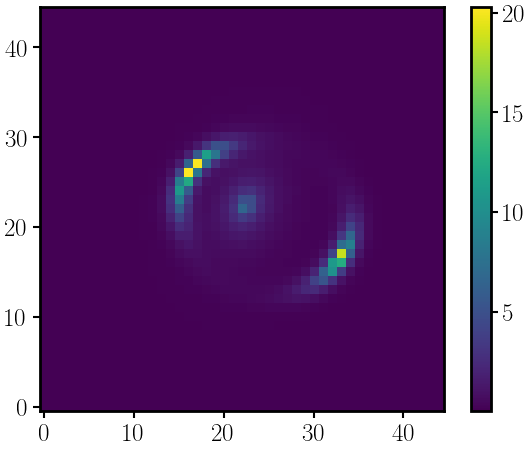

In [107]:
band = 'F106'
filter_name = 'Y106'

lens = SampleStrongLens()
model = lens.get_array(num_pix=45, side=4.95, band=band)

print(model.shape)
pixel_side, _ = model.shape

plot.plot(model, colorbar=True)

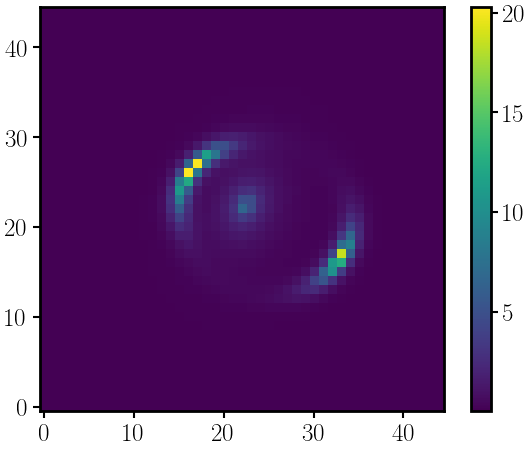

In [108]:
image = Image(model)
plot.plot(image.array, colorbar=True)

In [109]:
# get flux
lens_flux_cps = lens.lens_light_model_class.total_flux([lens.kwargs_lens_light_amp_dict[band]])[0]
source_flux_cps = lens.source_model_class.total_flux([lens.kwargs_source_amp_dict[band]])[0]
total_flux_cps = source_flux_cps + lens_flux_cps
print(lens_flux_cps, source_flux_cps, total_flux_cps)

242.69597845387628 50.2882320863091 292.98421054018536


In [110]:
# get interpolated image
interp = InterpolatedImage(image, scale=0.11, flux=total_flux_cps * 146)

In [111]:
# draw interpolated image
im = galsim.ImageF(45, 45)
drawn = interp.drawImage(im)

In [112]:
print(drawn.wcs.scale)

0.10886597938144331


In [113]:
# somewhere in here, retrieve an off-axis PSF with WebbPSF, import as a galsim.InterpolatedImage, then convolve using a GalSim method

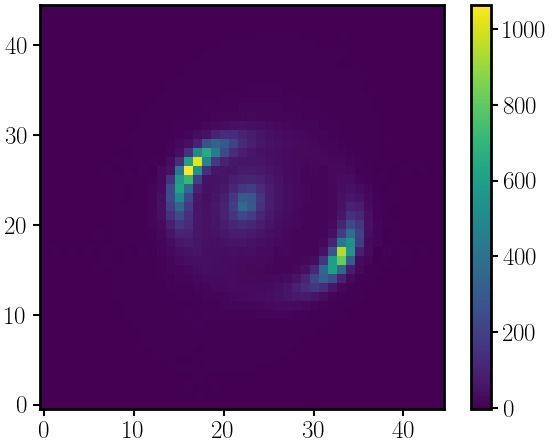

In [114]:
plot.plot(drawn.array, colorbar=True)

In [115]:
# add all detector effects: reciprocity failure, quantization, persistence (assuming a list of previous exposures has been provided), nonlinearity, interpixel capacitance
prev_exposures = roman.allDetectorEffects(drawn, prev_exposures=(), rng=None, exptime=146)

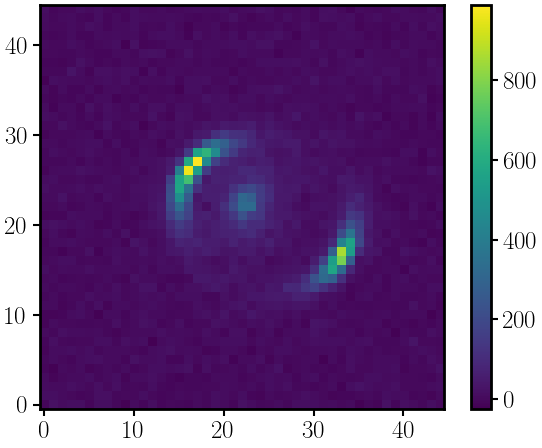

In [116]:
plot.plot(drawn.array, colorbar=True)

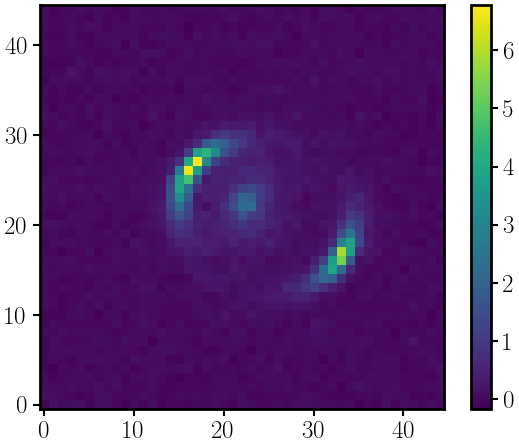

In [117]:
# convert to counts/sec/pixel by dividing through by exposure time
plot.plot(drawn.array / 146, colorbar=True)